# Classification Modelling with German Credit Data

### 1) Install and Import the Data

In [33]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [34]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

statlog_german_credit_data = fetch_ucirepo(id=144) 

df = pd.DataFrame(data = statlog_german_credit_data.data.features , columns = statlog_german_credit_data.feature_names)
df['target'] = statlog_german_credit_data.data.targets

print(df.head())

  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  ...  Attribute12 Attribute13  \
0        A75           4        A93        A101  ...         A121          67   
1        A73           2        A92        A101  ...         A121          22   
2        A74           2        A93        A101  ...         A121          49   
3        A74           2        A93        A103  ...         A122          45   
4        A73           3        A93        A101  ...         A124          53   

   Attribute14 Attribute15 Attribute16  Attribute17 Attribute18  Attribute

### 2) Exploring the Data:

In [35]:
print(df.corr())
print(df.isnull().sum())
print(df.describe())
print(df.info())

             Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  \
Attribute2     1.000000    0.624984    0.074749     0.034067    -0.036136   
Attribute5     0.624984    1.000000   -0.271316     0.028926     0.032716   
Attribute8     0.074749   -0.271316    1.000000     0.049302     0.058266   
Attribute11    0.034067    0.028926    0.049302     1.000000     0.266419   
Attribute13   -0.036136    0.032716    0.058266     0.266419     1.000000   
Attribute16   -0.011284    0.020795    0.021669     0.089625     0.149254   
Attribute18   -0.023834    0.017142   -0.071207     0.042643     0.118201   
target         0.214927    0.154739    0.072404     0.002967    -0.091127   

             Attribute16  Attribute18    target  
Attribute2     -0.011284    -0.023834  0.214927  
Attribute5      0.020795     0.017142  0.154739  
Attribute8      0.021669    -0.071207  0.072404  
Attribute11     0.089625     0.042643  0.002967  
Attribute13     0.149254     0.118201 -0.091127  
Attrib

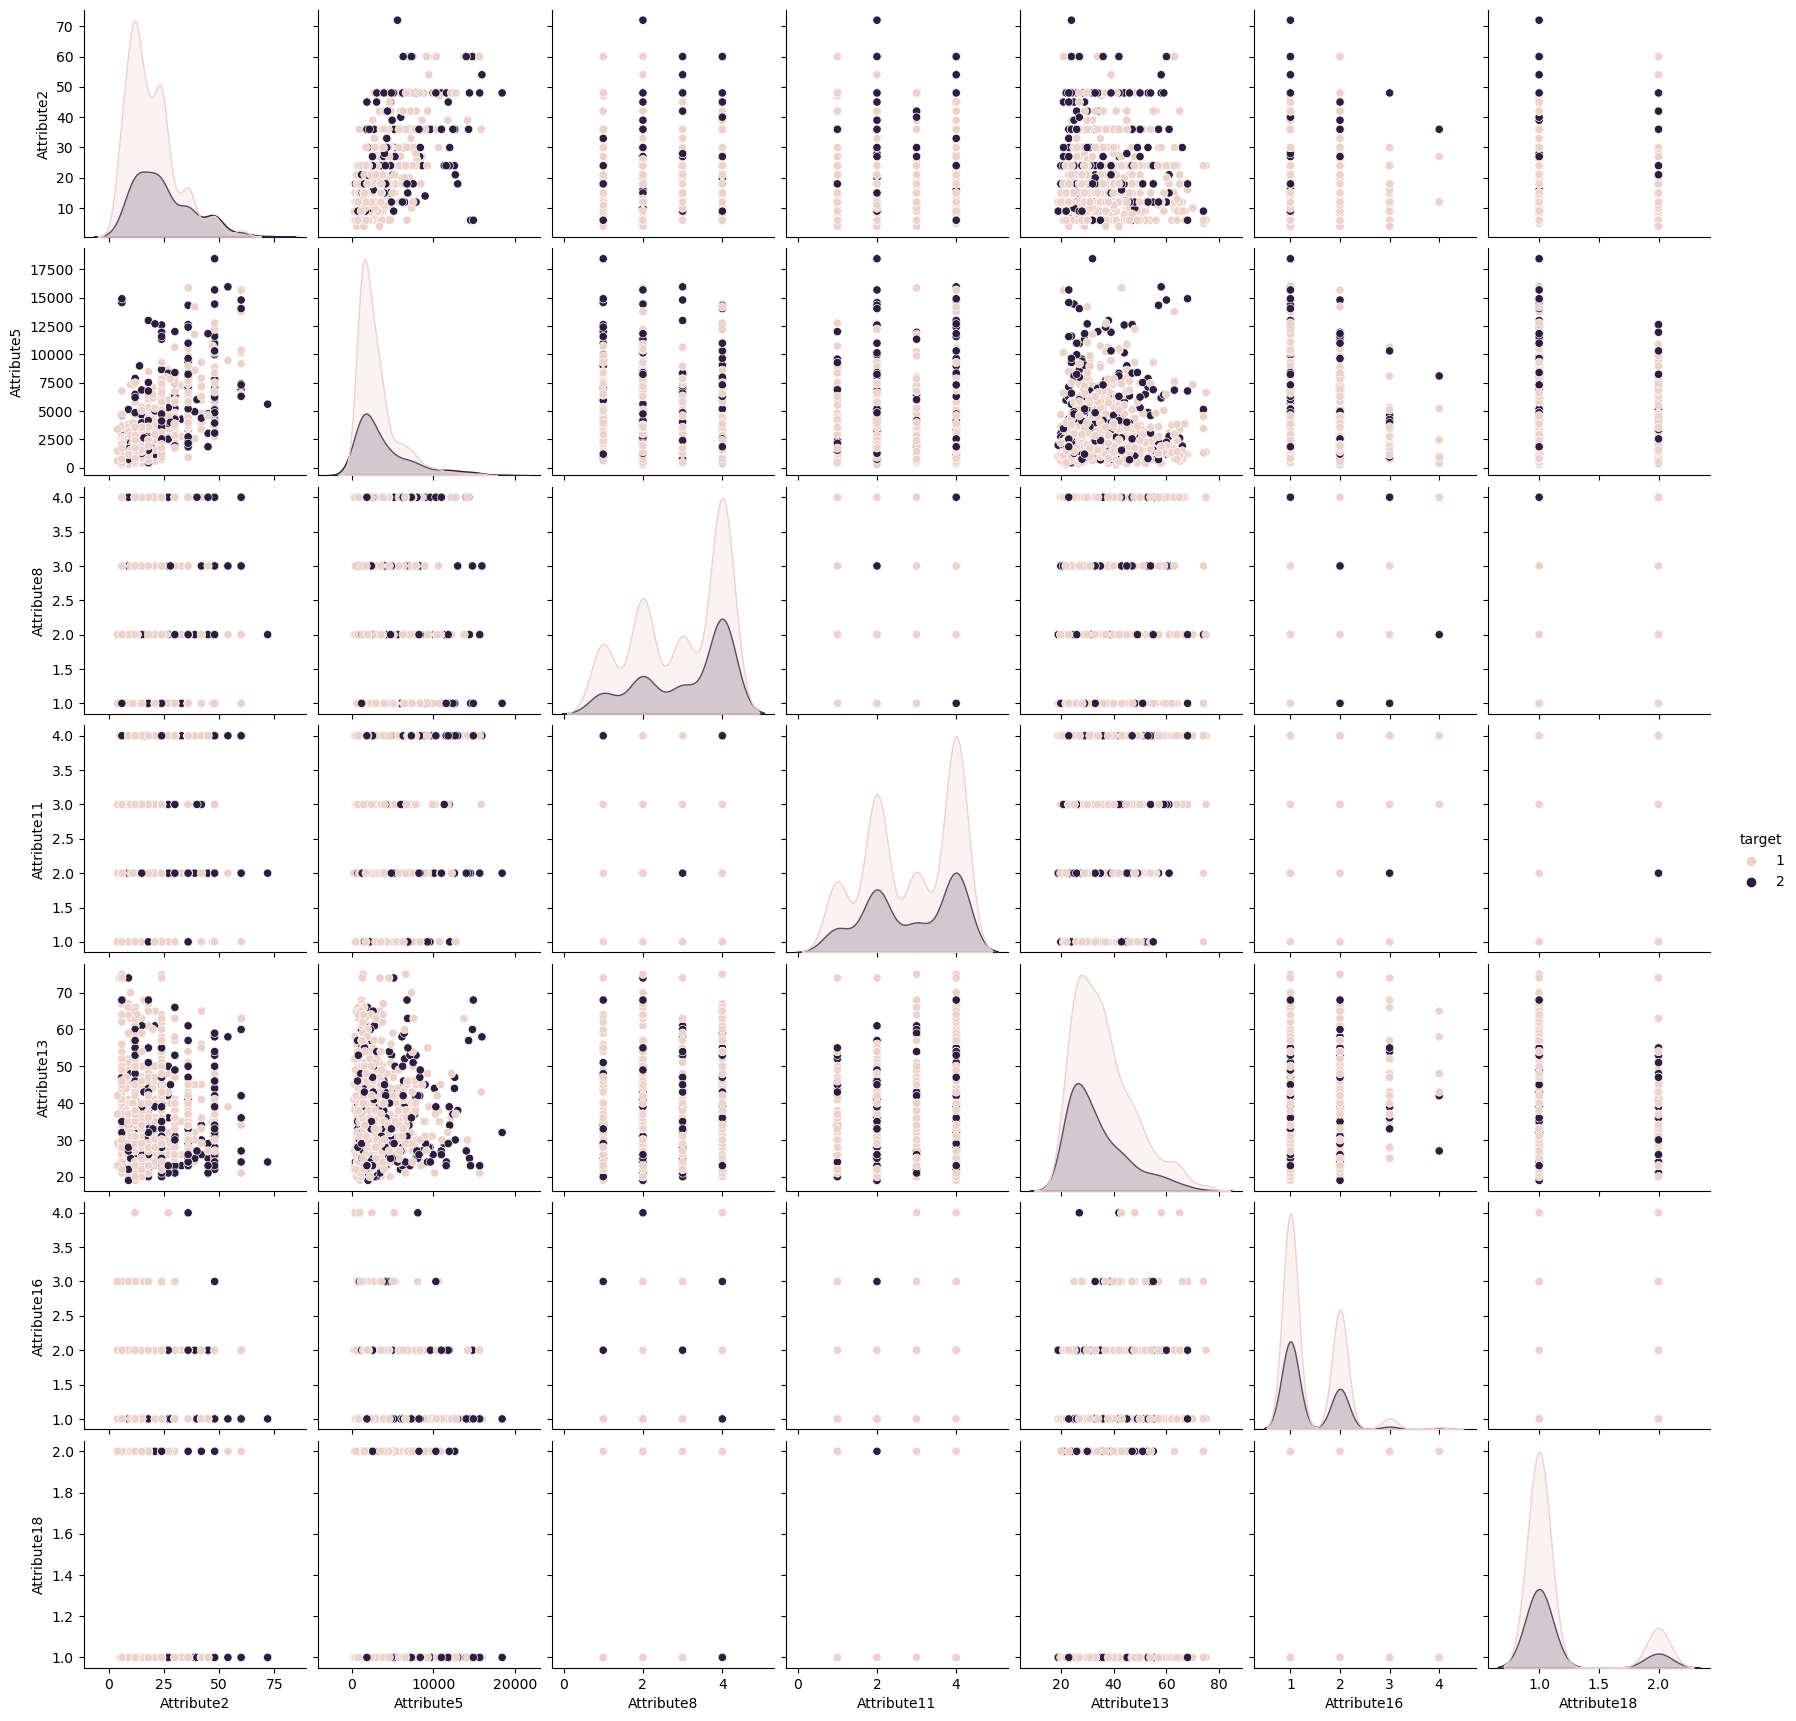

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = 'target')
plt.show()

#### Notes:

- 1) The target variable has the strongest correlation out of the numerical features with attribute 2, suggesting this will be an important feature in the model.
- 2) There are no nulls, so data cleaning is not necessary in in this model development.
- 3) The target variable has one class roughly twice more common than the other, worth considering when evaluating later which binary class the model performs well on or not.
- 4) Generally it appears most the pairplots are non linear and the lack of clusters by the target variable as against the features indicate it may be difficult to build a working predictive model.
- 5) The dataset contains both categorical and integer features, therefore when processing both standardisation and one hot encoding will be necessary to make sure the feature have an accurate impact on the model.
- 6) Some of the numerical columns are in fact categorical, these will have to be prepared appopriately the the Data Preprocessing stage. (The only truely numerical columns are attribute 2, 5, and 13).
- 7) The columns which are in fact categorical features, are currently set as object types.

### 3) Preparing the Data:

In [37]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import train_test_split

ordinal_cat_features = df[['Attribute8', 'Attribute11', 'Attribute16', 'Attribute18']] ## For OrdinalEncoder
cat_features = df.select_dtypes(include = 'object') ## For OneHotEncoder
int_features = df.select_dtypes(include = 'number').drop(columns = ordinal_cat_features.columns) ## For Standardising
int_features = int_features.drop(columns = 'target') ## Dropping Target variable
y = df['target']

print(ordinal_cat_features.head())
print(cat_features.head())
print(int_features.head())
print(y.head())

   Attribute8  Attribute11  Attribute16  Attribute18
0           4            4            2            1
1           2            2            1            1
2           2            3            1            2
3           2            4            1            2
4           3            4            2            2
  Attribute1 Attribute3 Attribute4 Attribute6 Attribute7 Attribute9  \
0        A11        A34        A43        A65        A75        A93   
1        A12        A32        A43        A61        A73        A92   
2        A14        A34        A46        A61        A74        A93   
3        A11        A32        A42        A61        A74        A93   
4        A11        A33        A40        A61        A73        A93   

  Attribute10 Attribute12 Attribute14 Attribute15 Attribute17 Attribute19  \
0        A101        A121        A143        A152        A173        A192   
1        A101        A121        A143        A152        A173        A191   
2        A101        A12

In [38]:
ordinal_encoder = OrdinalEncoder()
encoded_ordinal_features = ordinal_encoder.fit_transform(ordinal_cat_features)
encoded_ordinal_df = pd.DataFrame(encoded_ordinal_features, columns=ordinal_cat_features.columns)

onehotencoder = OneHotEncoder()
encoded_cat_features = onehotencoder.fit_transform(cat_features).toarray() ## For converting to a dataframe.
cat_feature_names = onehotencoder.get_feature_names_out()
encoded_cat_df = pd.DataFrame(encoded_cat_features, columns = cat_feature_names)

scaler = StandardScaler()
scaled_int_features = scaler.fit_transform(int_features)
int_feature_names = scaler.get_feature_names_out()
scaled_int_df = pd.DataFrame(scaled_int_features, columns = int_feature_names)


print(encoded_ordinal_df.head())
print(encoded_cat_df.head())
print(scaled_int_df.head())

   Attribute8  Attribute11  Attribute16  Attribute18
0         3.0          3.0          1.0          0.0
1         1.0          1.0          0.0          0.0
2         1.0          2.0          0.0          1.0
3         1.0          3.0          0.0          1.0
4         2.0          3.0          1.0          1.0
   Attribute1_A11  Attribute1_A12  Attribute1_A13  Attribute1_A14  \
0             1.0             0.0             0.0             0.0   
1             0.0             1.0             0.0             0.0   
2             0.0             0.0             0.0             1.0   
3             1.0             0.0             0.0             0.0   
4             1.0             0.0             0.0             0.0   

   Attribute3_A30  Attribute3_A31  Attribute3_A32  Attribute3_A33  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             1.0             0.0   
2             0.0             0.0             0.0           

In [39]:
X = pd.concat([encoded_ordinal_df, encoded_cat_df, scaled_int_df], axis = 1)

print(X.head)

<bound method NDFrame.head of      Attribute8  Attribute11  Attribute16  Attribute18  Attribute1_A11  \
0           3.0          3.0          1.0          0.0             1.0   
1           1.0          1.0          0.0          0.0             0.0   
2           1.0          2.0          0.0          1.0             0.0   
3           1.0          3.0          0.0          1.0             1.0   
4           2.0          3.0          1.0          1.0             1.0   
..          ...          ...          ...          ...             ...   
995         2.0          3.0          0.0          0.0             0.0   
996         3.0          3.0          0.0          0.0             1.0   
997         3.0          3.0          0.0          0.0             0.0   
998         3.0          3.0          0.0          0.0             1.0   
999         2.0          3.0          0.0          0.0             0.0   

     Attribute1_A12  Attribute1_A13  Attribute1_A14  Attribute3_A30  \
0         

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(f'Train size = {X_train.shape}')
print(f'Test size = {X_test.shape}')

Train size = (800, 61)
Test size = (200, 61)


#### Notes:

- As the preproccessing functions return arrays, I have had to reassign their feature names and turn them back into a dataframe.
- Axis = 1 to append horizontally (Columns), not rows.

### 4) Model Development and Evaluation - Logistic Regression and SVC

In [41]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter = 1000, random_state = 42, class_weight = 'balanced')

log_reg.fit(X_train, y_train)

log_reg_accuracy = log_reg.score(X_test, y_test)

print(f'Logistic Regression Accuracy: {log_reg_accuracy:.4f}')

Logistic Regression Accuracy: 0.7400


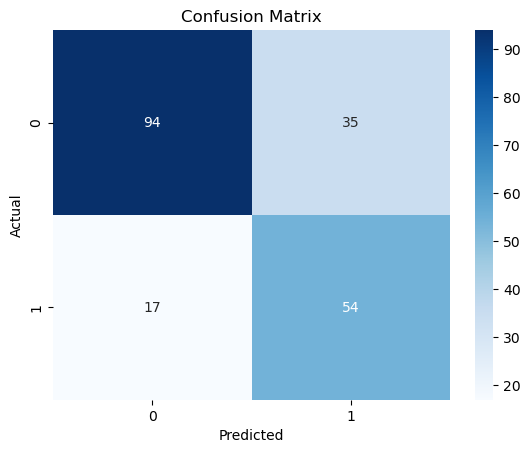

In [42]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

log_reg_y_pred = log_reg.predict(X_test)

log_reg_conf_matrix = confusion_matrix(y_test, log_reg_y_pred)

## Model is correctly predicting every class.

sns.heatmap(log_reg_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [43]:
from sklearn.svm import LinearSVC

svc = LinearSVC(max_iter = 1000, random_state = 42, dual = False, class_weight = 'balanced')

svc.fit(X_train, y_train)

svc_accuracy = svc.score(X_test, y_test)

print(f'SVC Accuracy: {svc_accuracy:.4f}')

SVC Accuracy: 0.7200


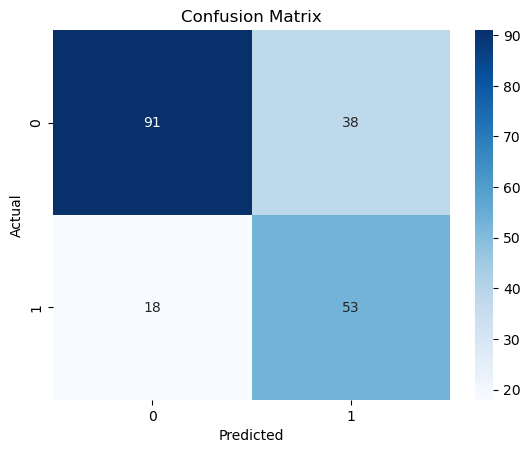

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

svc_y_pred = svc.predict(X_test)

svc_conf_matrix = confusion_matrix(y_test, svc_y_pred)

## Model is correctly predicting every class.

sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#### Notes:

- As there are more instances than features, I have had to use 'dual = False' for the SVC model.
- As stated earlier, the classes of the target variable are not split evenly, meaning they one class outweighs the other and could adversely effect the accuracy. Therefore, for both models I have used 'class_weight = balanced' with the intention the models will perform well on each class.
- With both models holding a rough accuracy of 71% it's not significantly impressive as one class itself is 70% of the target, i.e. if you predicted all the cases as the 0 class, it would only perform 1% worse that the models.

### 5) Models Tuning and Re-evaluation 

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}


log_reg_grid = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'), 
                            param_grid, 
                            cv=5)


log_reg_grid.fit(X_train, y_train)

log_reg_grid_accuracy = log_reg_grid.score(X_test, y_test)

log_reg_grid_best_params = log_reg_grid.best_params_

print(f'Logistic Regression Grid Search Accuracy: {log_reg_grid_accuracy:.4f}')
print(f'Logistic Regression Best Params: {log_reg_grid_best_params}')

Logistic Regression Grid Search Accuracy: 0.7400
Logistic Regression Best Params: {'C': 1}


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

svc_grid = GridSearchCV(LinearSVC(max_iter = 1000, random_state = 42, dual=False, class_weight = 'balanced'), 
                        param_grid, 
                        cv = 5)

svc_grid.fit(X_train, y_train)

svc_grid_accuracy = svc_grid.score(X_test, y_test)

svc_grid_best_params = svc_grid.best_params_

print(f'SVC Grid Search Accuracy: {svc_grid_accuracy:.4f}')
print(f'SVC Best Params: {svc_grid_best_params}')

SVC Grid Search Accuracy: 0.7300
SVC Best Params: {'C': 0.01}


#### Notes:

- The Grid Search only improved the SVC model by 1%, not a significant change. Whereas, the Logistic Regression method worked just as well. Meaning more complex models are not adding any additional performance with this data set.

### Model Comparision

In [47]:
from sklearn.model_selection import cross_val_score

logreg_scores = cross_val_score(log_reg, X, y, cv=5)
svc_scores = cross_val_score(svc, X, y, cv=5)

print(logreg_scores)
print(f'Logistic Regression Models Mean: {logreg_scores.mean():.4f} and Logistic Regression Models STD: {logreg_scores.std():.4f}')

print(svc_scores)
print(f'SVC Models Mean: {svc_scores.mean():.4f} and SVC Models STD: {svc_scores.std():.4f}')

[0.75  0.73  0.73  0.705 0.725]
Logistic Regression Models Mean: 0.7280 and Logistic Regression Models STD: 0.0144
[0.745 0.725 0.725 0.71  0.71 ]
SVC Models Mean: 0.7230 and SVC Models STD: 0.0129


#### Notes:

- Logistic Regression and SVC models perform equally as well, the differences in the mean accuracy and standard deviation are insignificant to draw conclusions (less than 1%.)

In [48]:
from sklearn.metrics import classification_report

log_reg_metrics = classification_report(y_test, log_reg_y_pred)
svc_metrics = classification_report(y_test, svc_y_pred)

print(f'Logistic Regression Metrics:')
print(log_reg_metrics)
print(f'SVC Metrics:')
print(svc_metrics)

Logistic Regression Metrics:
              precision    recall  f1-score   support

           1       0.85      0.73      0.78       129
           2       0.61      0.76      0.68        71

    accuracy                           0.74       200
   macro avg       0.73      0.74      0.73       200
weighted avg       0.76      0.74      0.74       200

SVC Metrics:
              precision    recall  f1-score   support

           1       0.83      0.71      0.76       129
           2       0.58      0.75      0.65        71

    accuracy                           0.72       200
   macro avg       0.71      0.73      0.71       200
weighted avg       0.75      0.72      0.73       200



#### Notes:

- The Logistic Regression's recall is insignificantly higher than the SVC model's. Although, with the cost of a false negative being higher, joint with the simplicity of a Logistic Regression model, I would opt for the use of this model if I had to make a choice. However, the margin in a business setting I would not employ either until higher performances were met.

### Key Learning Takeaways:

- Using multiple data preprocessing methods for the first time, i,e. OrdinalEncoder, OneHotEncoder, and StandardScaler to prepare a mix of feature types.
- Balancing a class weights for the first time due to an imbalance.
- Adjusting to the business objective and targeting recall as the more valuable metric than overall accuracy.